Treinando uma rede neural
=========================



## Introdução



Depois de uma longa jornada, finalmente chegamos ao *season finale* da nossa saga para construir uma rede neural artificial em Python puro. Agora que já conseguimos criar uma rede neural, o próximo passo é treinar essa rede.



## Objetivo



Treinar uma rede neural artificial tipo Multilayer Perceptron usando Python.



## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

## Código e discussão



### Classes



Abaixo estão as classes que criamos no notebook anterior. Elas são as classes de base para criarmos nossa rede neural MLP. Ao longo deste notebook vamos fazer as últimas modificações nelas.



In [2]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        pesos = []

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1))
            pesos.append(peso)

        self.pesos = pesos
        self.vies = Valor(random.uniform(-1, 1))

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado."

        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p

        soma = soma + self.vies
        dado_de_saida = soma.sig()
        return dado_de_saida
    
    def parametros(self):
        return self.pesos + [self.vies] # convertendo vies para uma lista, para concatenar


class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x):
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = []

        for neuronio in self.neuronios:
            informacao = neuronio(x)
            saidas.append(informacao)

        if len(saidas) == 1:
            return saidas[0]
        else:
            return saidas
    
    def parametros(self):
        params=[]
        for neuronio in self.neuronios:
            params.extend(neuronio.parametros())
        return params


class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x
    
    def parametros(self):
        params=[]
        for camada in self.camadas:
            params.extend(camada.parametros())
        return params
        

### A função de perda (*loss function*)



Fomos ao laboratório e sintetizamos 4 amostras de [complete com o que quiser]. Cada uma dessas amostras foi feita variando 3 parâmetros de processamento diferentes. Estas amostras e seus parâmetros de processamento estão representados na variável `x` abaixo.

Levamos essas 4 amostras no equipamento [complete com o que quiser] e obtivemos uma resposta que está representada na variável `y_true` abaixo.



In [3]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

Queremos treinar uma MLP que seja capaz de modelar o comportamento que observamos. Isto é, queremos uma rede neural que receba informação sobre os 3 parâmetros de processamento e que com isso seja capaz de prever qual o resultado que teríamos no equipamento que mencionamos no parágrafo anterior.

Vamos, primeiramente, criar uma rede neural simples do tipo MLP.



In [4]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Com nossa rede criada, podemos realizar uma previsão! Mas muito provavelmente esta previsão será bastante subótima.



In [5]:
# Teste de modelo não treinado. Resultado é aleatório, é preciso treinar a rede para obter resultados significativos
y_pred = []

for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.2803228572839586), Valor(data=0.294612267444015), Valor(data=0.2834698195070826), Valor(data=0.28763028333934015)]


Nosso resultado, assim como esperado, é bastante subótimo. Mas como quantificar isso? Seria bom se existisse uma forma de quantificar em um único número o quão boa está a previsão da minha rede.

Uma forma de quantificar a qualidade da previsão é usando uma `função de perda`, mais conhecida como `loss function`. Aqui podemos, por exemplo, computar a soma dos erros quadráticos. Esta é uma função de perda muito usada em problemas de regressão.



In [6]:
# Função de perda da rede neural NÃO treinada
erros_quadrados = []

for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
print(loss)

Valor(data=0.6567996851995029)


Valor da função de perda da rede neural não treinada= 0.6567996851995029

A variável `loss` é uma medida da performance da rede neural que criamos. Essa variável é uma instância de `Valor`, logo podemos facilmente observar o grafo computacional desta métrica.



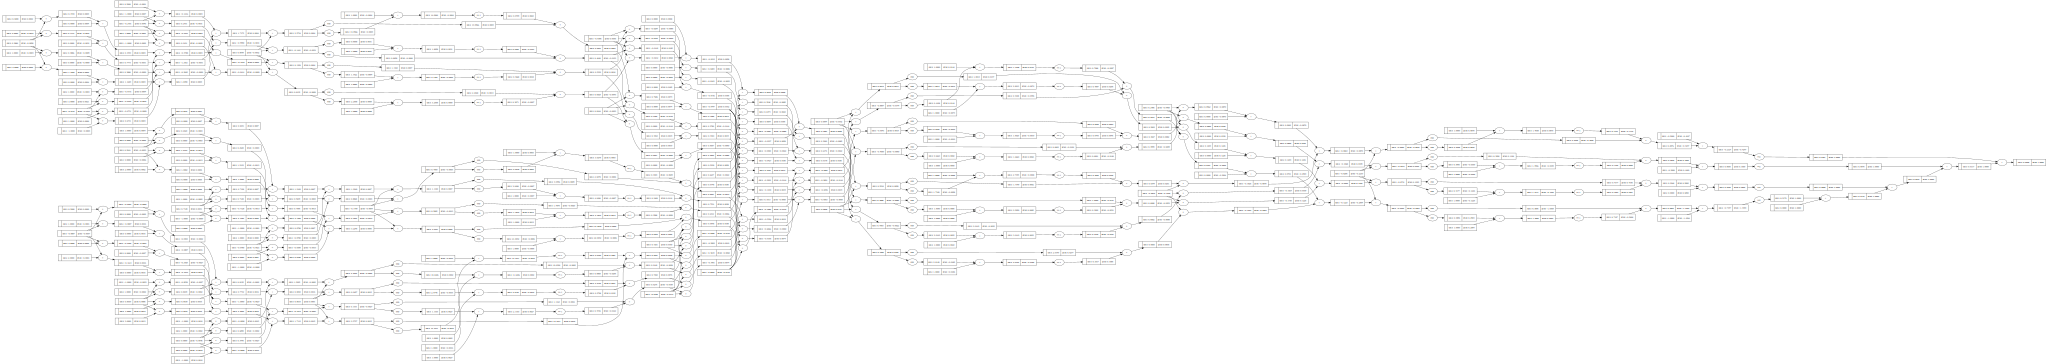

In [7]:
# Propagando a função perda: calculando gradiente de todos os nós automaticamente
loss.propagar_tudo()
grafo = plota_grafo(loss)
grafo.render("rede_neural", format="png")
grafo

### Treinando a rede através da atualização dos parâmetros



Como vimos acima, o grafo computacional da nossa rede neural é bastante complexo! Cheio de vértices!

Nosso objetivo é treinar a rede neural que criamos, sendo que para isso precisamos alterar os parâmetros internos da rede. O primeiro passo para fazer isso é alterar as nossas classes de forma que o código abaixo funcione.



In [8]:
parametros = minha_mlp.parametros()

print(len(parametros)) # Total de pparâmetros existente na rede
print()
parametros # Valor de cada parâmetro

23



[Valor(data=0.3886372984711963),
 Valor(data=-0.6731301376724159),
 Valor(data=-0.2431135522814738),
 Valor(data=0.854866935975739),
 Valor(data=-0.08067447203402378),
 Valor(data=0.853851654150845),
 Valor(data=0.6889617821008645),
 Valor(data=0.8614518249918783),
 Valor(data=0.5040893448889772),
 Valor(data=0.7128102635761453),
 Valor(data=-0.0780197757864276),
 Valor(data=-0.17990598079178688),
 Valor(data=0.8164411246710281),
 Valor(data=-0.6447748356643939),
 Valor(data=-0.8054821057516577),
 Valor(data=0.09935881257712142),
 Valor(data=-0.03055732863908589),
 Valor(data=0.7261192406218173),
 Valor(data=-0.044726174561104504),
 Valor(data=0.0828212158779742),
 Valor(data=0.24064658632692315),
 Valor(data=-0.2879112610228196),
 Valor(data=-0.8205140270880709)]

Agora que conseguimos &ldquo;extrair&rdquo; os parâmetros da nossa MLP, podemos fazer o treino deles! Temos que pensar bem como alterar os parâmetros da maneira correta. Lembre-se que nosso desejo é reduzir a métrica computada pela função de perda.



In [21]:
TAXA_DE_APRENDIZADO= 0.01 #(vamos alterar apenas 1% do gradiente)
for p in minha_mlp.parametros():
    p.data= p.data - p.grad * TAXA_DE_APRENDIZADO

Agora que executamos um &ldquo;ciclo&rdquo; de treino, podemos observar o impacto disso!



In [22]:
y_pred = []
for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

erros_quadrados = []
for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
loss.propagar_tudo()
print(loss)

Valor(data=0.5677395168469536)


Valor da função de perda da rede neural treinada= 0.6560438167395254

Redução de 0.000759 em relação à função de perda da rede neural não treinada

### A descida do gradiente



Apenas um &ldquo;ciclo&rdquo; de treino costuma não ser suficiente para treinarmos uma rede neural, precisamos de mais! Antes de seguir em frente, vamos definir um termo: chamamos de `época` toda vez que nossa rede neural propaga *todo* nosso dataset. É comum treinarmos redes neurais por dezenas, centenas e até milhares de épocas!

Vamos programar um treino completo da rede neural!

Um detalhe: sempre temos que zerar os gradientes antes de fazer o backpropagation. Isso é necessário pois cada vez que alteramos os parâmetros estaremos em outra posição da curva de perda e os gradientes antigos já não são mais válidos.



In [23]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui. Uma lista em que cada item representa o número de neurônios na camada oculta de cada camada

x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]
minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [41]:
NUM_EPOCAS = 10
TAXA_DE_APRENDIZADO = 0.01

for epoca in range(NUM_EPOCAS):
    # forward pass: passar os dados pela rede e calcular y predito
    y_pred = []
    for x_ in x:
        previsao = minha_mlp(x_)
        y_pred.append(previsao)

    # zero grad: zerar os gradientes, pos cada vez que atualizamos parâmetros mudamos de posição
    for p in minha_mlp.parametros():
        p.grad = 0
    
     # loss: calcular a função de perda
    loss = []
    for yp, yv in zip(y_pred, y_true):
        loss.append((yp - yv)**2)
    loss = sum(loss)

    # backpropagation: recalcula gradientes
    loss.propagar_tudo()

    # atualiza parâmetros: recalcula o valor dos parâmetros com base nos gradientes
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado
    print(epoca, loss.data)

0 0.7619332676623595
1 0.7587488211040491
2 0.7556047705312883
3 0.7525010752939486
4 0.7494376766477745
5 0.7464144982140091
6 0.743431446450235
7 0.7404884111311709
8 0.7375852658381793
9 0.7347218684562549


Após o treino, podemos checar se nossa rede é capaz de prever os dados que coletamos com boa performance.



In [42]:
print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.6260446754124376), Valor(data=0.6268494727516036), Valor(data=0.630393655164405), Valor(data=0.6292297325468311)]


Esse processo de atualizar os parâmetros da rede neural observando os gradientes locais é chamado de `descida do gradiente` (ou apenas `método do gradiente`).



## Conclusão



Nesse notebook, finalmente terinamos de programar nossa primeira rede neural utilizando python puro. 

Primeiramente fomos introduzidos a um conceito muito importante, o de função de perda: número que quantifica quão boa ou ruim é a minha previsão. semelhante ao "fitness" do algoritmo genético. Cada problema demanda uma função de perda diferente. Para tanto, usamos a soma dos mínimos quadrados.

A partir da propagação da função de perda, tivemos que identificar quais valores são parâmetros. Nesse caso, são os pesos e os viéses. Criamos, então, nas classes Neuronio, Camadas e MLP o método "parâmetros", que navega por todo os parâmetros (pesos e viéses dos neurônios).

Outro conceito que nos foi apresentado foi o de `épocas`: toda vez que a rede neural viu todos os seus dados, isto é, todos os dados foram passados e a função de perda foi calculada, isso é chamado de "época".

Por fim, nas últimas células do código, iteramos as 5 etapas necessárias para rodar nossa rede neural:
    
1- `Fowardpass`:  passar os dados pela rede e calcular y predito, sem calcular os gradientes
    
2- `Zerando o gradiente`: igualar a zero os gradientes calculados anteriormente
    
3- `Calculando a função de perda`: calculando quão boa ou ruim foi a previsão, utilizando mínimos quadrados
    
4- `Backpropagation`: calculando novos dados de gradiente
    
5- `Atualizando parâmetros`: calculando novos dados de parâmetro com base nos gradientes calculados na etapa imediatamente anterior e na taxa de aprendizado pré definida

Finalmente, então, temos uma rede neural programada! Podemos ver, pelo resultado do laço de iteração, que a função de perda de fato vai reduzindo conforme a época. Podemos melhorar ainda mais essa redução da função de perda mudando o valor da taxa de aprendizado.

## Playground

